## Filters

In addition to taking advantage of color information, we also have knowledge about patterns of grayscale intensity in an image. Intensity is a measure of light and dark similar to brightness, and we can often identify the edges of an object by looking at an abrupt change in intensity, which happens when an image changes from a very dark to light area, or vice versa.

To detect these changes, you’ll be using and creating specific image filters that look at groups of pixels and detect big changes in intensity in an image. These filters produce an output that shows these edges.


## Frequency in images

We have an intuition of what frequency means when it comes to sound. High-frequency is a high pitched noise, like a bird chirp or violin. And low frequency sounds are low pitch, like a deep voice or a bass drum. For sound, frequency actually refers to how fast a sound wave is oscillating; oscillations are usually measured in cycles/s (Hz), and high pitches and made by high-frequency waves. 

High and low frequency:
Similarly, frequency in images is a rate of change. Images change in space, and a high frequency image is one where the intensity changes a lot. And the level of brightness changes quickly from one pixel to the next. A low frequency image may be one that is relatively uniform in brightness or changes very slowly. 

#### * High-frequency components also correspond to the edges of objects in images, which can help us classify those objects. *

## Fourier Transforms

The Fourier Transform (FT) is an important image processing tool which is used to decompose an image into its frequency components. The output of an FT represents the image in the frequency domain, while the input image is the spatial domain (x, y) equivalent. In the frequency domain image, each point represents a particular frequency contained in the spatial domain image. So, for images with a lot of high-frequency components (edges, corners, and stripes), there will be a number of points in the frequency domain at high frequency values.

The frequency components of an image can be displayed after doing a Fourier Transform (FT). An FT looks at the components of an image (edges that are high-frequency, and areas of smooth color as low-frequency), and plots the frequencies that occur as points in spectrum.

In fact, an FT treats patterns of intensity in an image as sine waves with a particular frequency, and you can look at an interesting visualization of these sine wave components [on this page](https://plus.maths.org/content/fourier-transforms-images).

In this notebook, we'll first look at a few simple image patterns to build up an idea of what image frequency components look like, and then transform a more complex image to see what it looks like in the frequency domain.

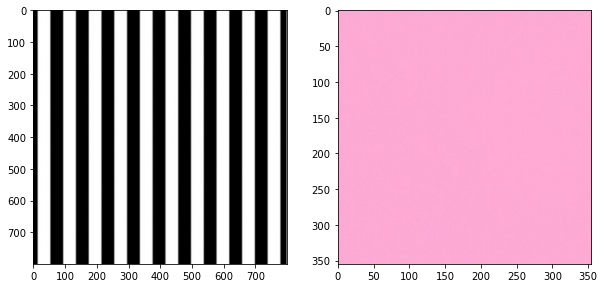

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the images
image_stripes = cv2.imread('images/stripes.jpg')
image_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_BGR2RGB)

# Read in the images
image_solid = cv2.imread('images/pink_solid.jpg')
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(image_stripes)
ax2.imshow(image_solid)

In [11]:
# convert to grayscale to focus on the intensity patterns in the image
gray_stripes = cv2.cvtColor(image_stripes, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

# normalize the image color values from a range of [0,255] to [0,1] for further processing
norm_stripes = gray_stripes/255.0
norm_solid = gray_solid/255.0

# perform a fast fourier transform and create a scaled, frequency transform image
def ft_image(norm_image):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(norm_image)
    
    # scaled
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx


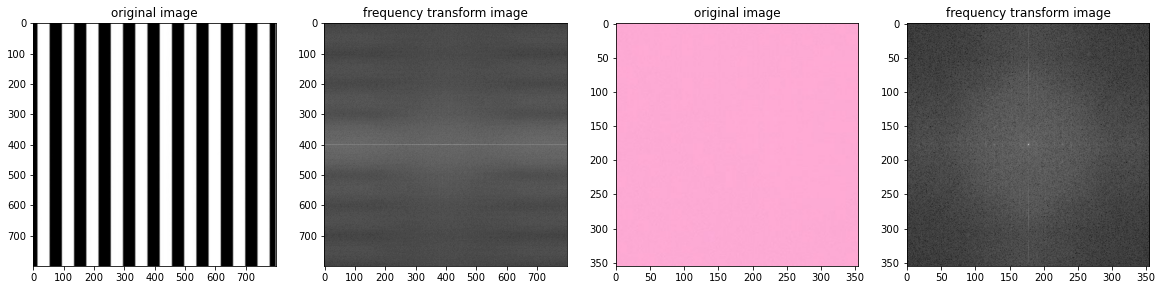

In [12]:
# Call the function on the normalized images
# and display the transforms
f_stripes = ft_image(norm_stripes)
f_solid = ft_image(norm_solid)

# display the images
# original images to the left of their frequency transform
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image_stripes)
ax2.set_title('frequency transform image')
ax2.imshow(f_stripes, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image_solid)
ax4.set_title('frequency transform image')
ax4.imshow(f_solid, cmap='gray')


Low frequencies are at the center of the frequency transform image. 

The transform images for these example show that the solid image has most low-frequency components (as seen by the center bright spot). 

The stripes tranform image contains low-frequencies for the areas of white and black color and high frequencies for the edges in between those colors. The stripes transform image also tells us that there is one dominating direction for these frequencies; vertical stripes are represented by a horizontal line passing through the center of the frequency transform image.

Next, let's see what this looks like applied to a real-world image.

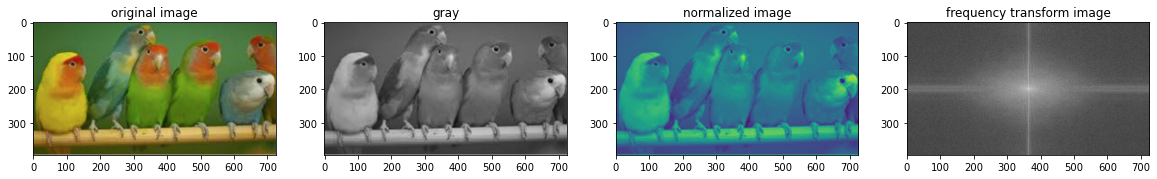

In [13]:
# Read in an image
image = cv2.imread('images/birds.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# normalize the image
norm_image = gray/255.0

f_image = ft_image(norm_image)

# Display the images
f, (ax1,ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image)

ax2.set_title('gray')
ax2.imshow(gray, cmap='gray')

ax3.set_title('normalized image')
ax3.imshow(norm_image)

ax4.set_title('frequency transform image')
ax4.imshow(f_image, cmap='gray')

Notice that this image has components of all frequencies. You can see a bright spot in the center of the transform image, which tells us that a large portion of the image is low-frequency; this makes sense since the body of the birds and background are solid colors. The transform image also tells us that there are **two** dominating directions for these frequencies; vertical edges (from the edges of birds) are represented by a horizontal line passing through the center of the frequency transform image, and horizontal edges (from the branch and tops of the birds' heads) are represented by a vertical line passing through the center.